In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df=pd.concat([df,pd.get_dummies(df['mainroad'],dtype=int,drop_first=True,prefix='mainroad')],axis=1)

In [6]:
df=df.drop('mainroad',axis=1)

In [7]:
df=pd.concat([df,pd.get_dummies(df['guestroom'],dtype=int,drop_first=True,prefix='guestroom')],axis=1)

In [8]:
df=df.drop('guestroom',axis=1)

In [9]:
df=pd.concat([df,pd.get_dummies(df['basement'],dtype=int,drop_first=True,prefix='basement')],axis=1)

In [10]:
df=df.drop('basement',axis=1)

In [11]:
df

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,1,0,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,1,0,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,1,0,1
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,1,0,1
4,11410000,7420,4,1,2,no,yes,2,no,furnished,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,no,2,no,unfurnished,1,0,1
541,1767150,2400,3,1,1,no,no,0,no,semi-furnished,0,0,0
542,1750000,3620,2,1,1,no,no,0,no,unfurnished,1,0,0
543,1750000,2910,3,1,1,no,no,0,no,furnished,0,0,0


In [12]:
df=pd.concat([df,pd.get_dummies(df['hotwaterheating'],dtype=int,drop_first=True,prefix='hotwaterheating')],axis=1)
df=df.drop('hotwaterheating',axis=1)

In [13]:
df=pd.concat([df,pd.get_dummies(df['airconditioning'],dtype=int,drop_first=True,prefix='airconditioning')],axis=1)
df=df.drop('airconditioning',axis=1)

In [14]:
df=pd.concat([df,pd.get_dummies(df['prefarea'],dtype=int,drop_first=True,prefix='prefarea')],axis=1)
df=df.drop('prefarea',axis=1)

In [15]:
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,semi-furnished,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,unfurnished,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,furnished,0,0,0,0,0,0


In [16]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [17]:
furnishingmap={
    'unfurnished':0,
    'semi-furnished':1,
    'furnished':2
}

In [18]:
df['furnishingstatus_mapped']=df['furnishingstatus'].map(furnishingmap)

In [19]:
df=df.drop('furnishingstatus',axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   price                    545 non-null    int64
 1   area                     545 non-null    int64
 2   bedrooms                 545 non-null    int64
 3   bathrooms                545 non-null    int64
 4   stories                  545 non-null    int64
 5   parking                  545 non-null    int64
 6   mainroad_yes             545 non-null    int32
 7   guestroom_yes            545 non-null    int32
 8   basement_yes             545 non-null    int32
 9   hotwaterheating_yes      545 non-null    int32
 10  airconditioning_yes      545 non-null    int32
 11  prefarea_yes             545 non-null    int32
 12  furnishingstatus_mapped  545 non-null    int64
dtypes: int32(6), int64(7)
memory usage: 42.7 KB


<Axes: >

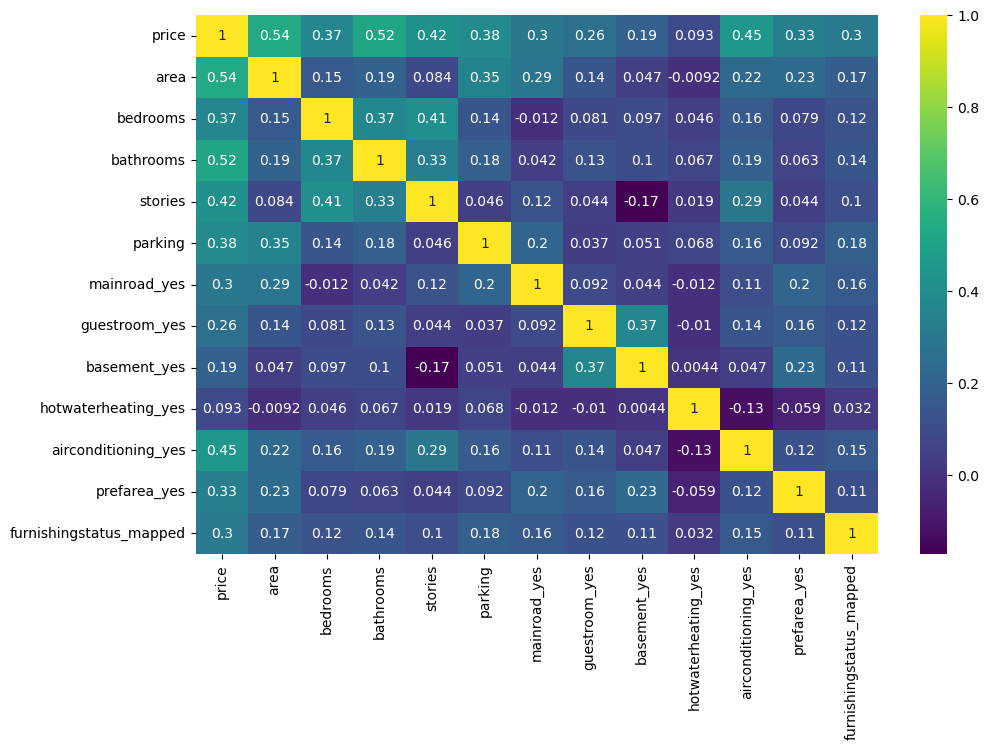

In [21]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: xlabel='area', ylabel='price'>

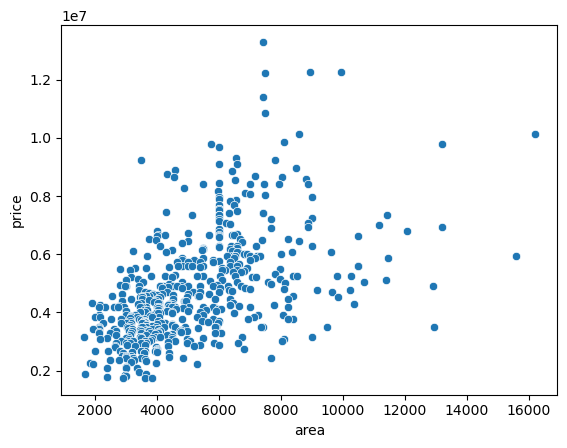

In [22]:
sns.scatterplot(data=df,y='price',x='area')

In [23]:
y=df['price']
X=df.drop('price',axis=1)

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import mean_squared_error

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [27]:
y=(y-y.mean(axis=0))/y.std(axis=0)


In [28]:
class MyLinearRegressionModel:
    def __init__(self,learning_rate=0.1,n_iterations=10000):
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
        self.beta = None
    def fit(self,X,y):
        X_b=np.c_[np.ones((X.shape[0],1)),X]
        self.beta=np.zeros(X_b.shape[1])
        y_pred=X_b.dot(self.beta)
        error=y_pred-y
        gradient=(2/X_b.shape[0])*X_b.T.dot(error)
        self.beta=self.beta-self.learning_rate*gradient
    def predict(self,X):
        X_b=np.c_[np.ones((X.shape[0],1)),X]
        y_pred=X_b.dot(self.beta)
        return y_pred
    def squared_error(self,y,y_pred):
        return np.mean((y-y_pred)**2)
    def score(self, X, y):
        y_pred = self.predict(X)
        return 1-np.mean((y - y_pred)**2)/np.var(y)

        
        

In [36]:
from sklearn.metrics import r2_score

# ======= Custom Model =======
model1 = MyLinearRegressionModel(learning_rate=0.2, n_iterations=50000)
model1.fit(X, y)
pred=model1.predict(X)
squared_error = model1.squared_error(y, pred)
r2_custom=model1.score(X,y)

# ======= Sklearn Model =======
sk_model = LinearRegression()
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X)
squared_error_sk = mean_squared_error(y, y_pred_sk)
r2_sk=r2_score(y,y_pred_sk)
# ======= Compare =======
print(f" My Model squared_error: {squared_error:.4f}")
print(f" Sklearn Model squared_error: {squared_error_sk:.4f}")
print(f" My model r2 Score: {r2_custom:.4f}")
print(f" Sklearn Model r2 Score: {r2_sk:.4f}")


 My Model squared_error: 0.3383
 Sklearn Model squared_error: 0.3193
 My model r2 Score: 0.6611
 Sklearn Model r2 Score: 0.6801


In [38]:
squared_error=[]
for i in np.linspace(0,1,50):
    model = MyLinearRegressionModel(learning_rate=i,n_iterations=50000)
    model.fit(X,y)
    pred=model.predict(X)
    error=model.squared_error(y,pred)
    squared_error.append(error)

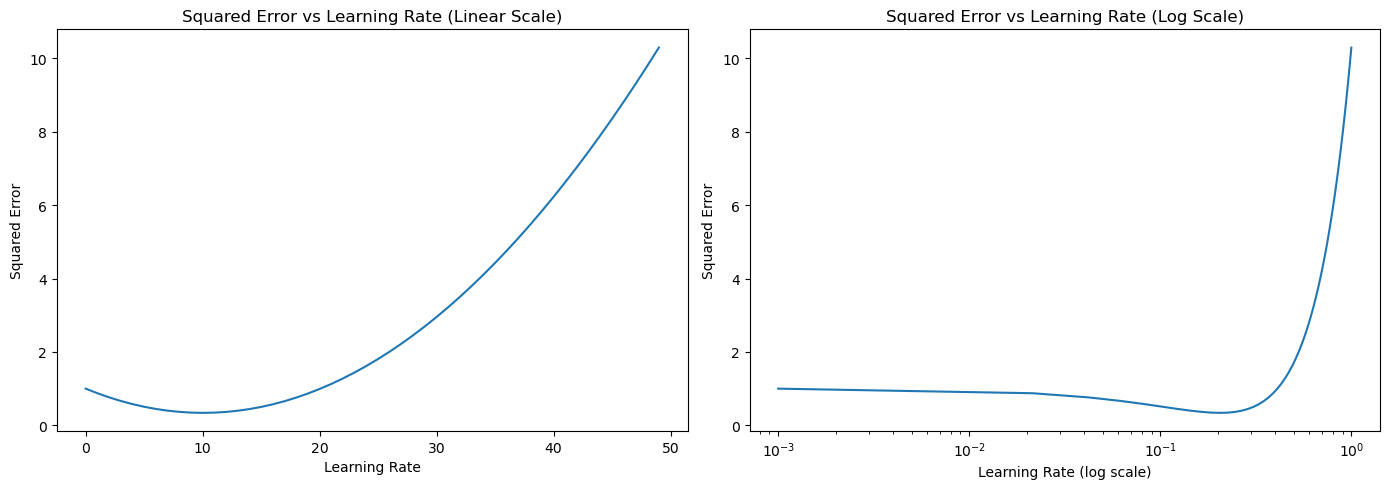

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

axs[0].plot(squared_error)
axs[0].set_title("Squared Error vs Learning Rate (Linear Scale)")
axs[0].set_xlabel("Learning Rate")
axs[0].set_ylabel("Squared Error")

axs[1].semilogx(np.linspace(0.001, 1, 50), squared_error)
axs[1].set_title("Squared Error vs Learning Rate (Log Scale)")
axs[1].set_xlabel("Learning Rate (log scale)")
axs[1].set_ylabel("Squared Error")

plt.tight_layout()
plt.show()


In [42]:
import joblib

In [52]:
joblib.dump(model,'CustomLinearRegressionModel.pkl')

['CustomLinearRegressionModel.pkl']